# Examen Módulo 2 - Montecarlo - 4.

**Mantenga la calma y lea cuidadosamente las siguientes indicaciones antes de comenzar el examen:**
- Para resolver el examen edite este mismo archivo y renómbrelo de la siguiente manera: *Examen2_ApellidoNombre*, donde *ApellidoNombre* corresponde a su apellido paterno con la inicial en mayúscula, seguido de su primer nombre con la inicial en mayúscula **sin acentos**. Por ejemplo, en mi caso el nombre del archivo sería *Examen2_ArellanoCarlos*.
- Resuelva los puntos en el espacio provisto. Si requiere agregar más celdas para código o escritura, hágalo (`Esc`+`B`) o (`Esc`+`A`).
- Recuerde que también se está evaluando su capacidad de interpretar los resultados. Escriba sus interpretaciones/conclusiones en celdas utilizando *Markdown*.
- El formato de presentación de todo el examen en general debe ser adecuado. Use tamaños de letra, colores, etiquetas, etcétera.
- No se resuelven dudas de ningún tipo por los profesores de la asignatura. Por favor absténgase de preguntar.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

---
### Integración Montecarlo tipo 1 <font size='1'>(25 puntos)</font>

Encuentre los valores de $y(0.3)$, $y(0.5)$, $y(0.7)$, $y(0.9)$ y $y(1.1)$, conociendo $y(0.1)=0.1$ y su derivada
$$
\frac{dy}{dx}=\frac{\ln(2+\sin(2x^2))}{xe^{-x^3}},\quad y(0.1)=0.1
$$

Para cada intervalo: $(0.1\leq x\leq0.3)$, $(0.3\leq x\leq0.5)$, $(0.5\leq x\leq0.7)$, $(0.7\leq x\leq0.9)$ y $(0.9\leq x\leq1.1)$ use integración Montecarlo de tipo 1 con $10^6$ puntos.

1. Escriba la función de integración Montecarlo de tipo 1, con argumentos de entrada $f$, $a$, $b$ y $N$. Donde $f$ es la función a integrar, $a$ y $b$ son los límites de integración y $N$ es el número de puntos utilizados para la integración. Y que regrese el valor de la integral.

In [2]:
import numpy as np
import matplotlib.pyplot as pt 
import pandas as pd
%matplotlib inline

In [3]:
def montecarlo(f, N, limites):
    u = np.random.uniform(limites[0], limites[1], N)
    return np.mean(f(u))*(limites[1]-limites[0])

2. Defina la función a integrar con argumentos de entrada $x$ y que regrese el valor de la derivada $\frac{dy}{dx}$.

In [4]:
def diff1(x):
    return (np.log(2+np.sin(2*x**2)))/(x*np.exp(-(x**3)))

3. Encuentre la aproximación de las integrales con el método de Montecarlo de tipo 1. Escriba sus resultados en un _DataFrame_ de _pandas_.

In [5]:
limites = [(0.1, 0.3), (0.3, 0.5), (0.5, 0.7), (0.7, 0.9), (0.9, 1.1)]
table = pd.DataFrame(columns=["Aproximación"])
for lim in limites:
    table.loc[str(lim), "Aproximación"] = montecarlo(diff1, 10**6, lim)
table

,Aproximación
"(0.1, 0.3)",0.807239
"(0.3, 0.5)",0.455523
"(0.5, 0.7)",0.408141
"(0.7, 0.9)",0.455703
"(0.9, 1.1)",0.583822


4. Use el teorema fundamental del cálculo (visto en cálculo integral) para escribir la secuencia de valores para la solución $y(x)$, esto es $[y(0.1), y(0.3), y(0.5), y(0.7), y(0.9), y(1.1)]$.

Note que $y(0.3)=y(0.1)+\int_{0.1}^{0.3}\frac{dy}{dx}dx$, $y(0.5)=y(0.3)+\int_{0.3}^{0.5}\frac{dy}{dx}dx$, etc.

In [6]:
valores = [(0.1, 0.1)]
for i in range(30, 111, 20):
    eval = i/100
    valores.append((eval, valores[-1][1]+table.loc[str((round(eval-0.2, 1), eval)), "Aproximación"]))
for i in valores:
    print("y({}): {}".format(i[0], i[1]))

y(0.1): 0.1
y(0.3): 0.9072387084210679
y(0.5): 1.362761986997162
y(0.7): 1.7709024956200168
y(0.9): 2.226605609610284
y(1.1): 2.8104278713579163


---
### Integración Montecarlo tipo 2 <font size='1'>(25 puntos)</font>
Encuentre el área que cumpla $f(x,y)>v$, donde 
$$
f(x,y)=e^{-0.05(x^2+y^2)}\sin(x^2+y^2),
$$
y $v=0.5$.

1. Escriba la función que discrimine los puntos que satisfacen la restricción $f(x,y)>v$, con argumentos de entrada $x$ y $y$ y que regrese Verdadero o Falso.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def montecarlo(x,y):
    return (np.exp(-0.05 * (x**2 + y**2)) * np.sin(x**2 + y**2)) > 0.5

2. Encuentre los límites de integración para $x$ y para $y$ que encierren el área deseada y grafique.

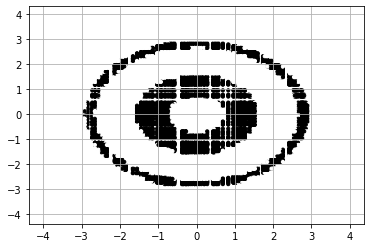

In [8]:
N=200
x1,y1=-4,4
x2,y2=-4,4
x=np.random.uniform(x1,y1,N)
y=np.random.uniform(x2,y2,N)
X,Y=np.meshgrid(x,y)
plt.scatter(X,Y,c=~montecarlo(X,Y),cmap='gray',s=10)
plt.grid()

3. Escriba la función para integrar con el método de Montecaralo de tipo 2 con argumentos de entrada $f$, $xmin$, $xmax$, $ymin$, $ymax$, y $N$. Donde $f$ es una función que define la región de integración; $xmin$, $xmax$, $ymin$ y $ymax$ definen los límites de integración y $N$ el número de puntos en $x$ y $y$ para usar en el método. Esta función debe regresar el valor de la integral.

In [9]:
def tipo2(reg,x1,y1,x2,y2,N):
    x=np.random.uniform(x1,y1,N)
    y=np.random.uniform(x2,y2,N)
    B=reg(x,y)
    AR=(y1-x1)*(y2-x2)
    return AR*np.mean(B)

4. En un _DataFrame_ de _pandas_ escriba el valor de **las integrales** y la **estimación del error relativo** para $N=10^4,\, 10^5,\, 10^6$.

In [10]:
N=np.logspace(4,6,5).astype('int')
N

array([  10000,   31622,  100000,  316227, 1000000])

In [11]:
import pandas as pd
tabla=pd.DataFrame(index=N,columns=['Aprox.','Error'])
for n in N:
    tabla.loc[n,'Aprox.']=tipo2(montecarlo,x1,y1,x2,y2,n)
    th=tabla.loc[n,'Aprox.']/((y1-x1)*(y2-x2))
    tabla.loc[n,'Error']=1/np.sqrt(n)*np.sqrt((1-th)/th)
tabla

,Aprox.,Error
10000,10.88,0.022096
31622,10.991841,0.012349
100000,10.90368,0.006978
316227,10.946668,0.003915
1000000,10.910272,0.002206


---
### Generación de fractales <font size='1'>(25 puntos)</font>

Los fractales de tipo Barnsley se generan con transformaciones afines con cierta probabilidad.

Genere un helecho tridimensional con la ecuación:
$$
\begin{bmatrix}x_{k+1}\\y_{k+1}\\z_{k+1}
\end{bmatrix}=A_i\begin{bmatrix}x_k\\y_k\\z_k\end{bmatrix}+b_i
$$
Y sus respectivas matrices:

In [2]:
import pandas as pd
import numpy as np

A0 = np.array([[0,0,0],[0,0.18,0],[0,0,0]])
b0 = np.array([0,0,0])

A1 = np.array([[0.85,0,0],[0,0.85,0.1],[0,-0.1,0.85]])
b1 = np.array([0,1.6,0])

A2 = np.array([[0.2,-0.2,0],[0.2,0.2,0],[0,0,0.3]])
b2 = np.array([0,0.8,0])

A3 = np.array([[-0.2,0.2,0],[0.2,0.2,0],[0,0,0.3]])
b3 = np.array([0,0.8,0])

A = [A0, A1, A2, A3]
b = [b0, b1, b2, b3]

cuya probabilidad es la misma para cada $i=\{0,1,2,3\}$. Use la función scatter de una proyección 3D sobre los ejes:
```
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure()
ax=fig.gca(projection='3d')
ax.scatter(x,y,z)
```

In [6]:
#Definimos "a" y "b" con el resultado anterior
A = [A0, A1, A2, A3]
b = [b0, b1, b2, b3]

/var/folders/l7/cq9n__j16231cq2hkk5qfj1c0000gn/T/ipykernel_2815/1164514564.py:28: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax=fig.gca(projection='3d')


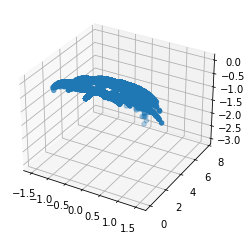

In [8]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
random.seed(80)

x = [0]
y = [0]
z = [0]
i = np.arange(4)

for k in range(10**6):
    ir = random.choices(i)[0]
    
    Ar = A[ir]
    br = b[ir]
    

    xkm1 = Ar[0][0]*x[-1] + Ar[0][1]*y[-1] + Ar[0][2]*z[-1] + br[0]
    ykm1 = Ar[1][0]*x[-1] + Ar[1][1]*y[-1] + Ar[1][2]*z[-1] + br[1]
    zkm1 = Ar[2][0]*x[-1] + Ar[2][1]*y[-1] + Ar[2][2]*z[-1] + br[2]

    x.append(xkm1)
    y.append(ykm1)
    z.append(zkm1)
    
fig=plt.figure()
ax=fig.gca(projection='3d')
ax.scatter(x,y,z)

---
### Probabilidad Precio-Umbral <font size='1'>(25 puntos)</font>

Suponga que desea invertir en **Oracle** o **Intel**. Evalúe la probabilidad de obtener un retorno del 10% en tres meses a partir del 31 de octubre del 2021.

1. Describa una función para obtener los precios de cierre ajustados para dividendos y divisiones desde *YAHOO finance*, usando el paquete de *pandas-datareader*, donde los argumentos de entrada sean los nombres de las empresas y las fechas de inicio y fin a los cuales se obtendrán los datos.

In [24]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
from datetime import datetime
%matplotlib inline

def getClose(name, start, end):
    return web.DataReader(name, "yahoo", start, end)["Adj Close"]

2. Obtenga los precios de cierre ajustados para Spotify y Mercado Libre desde el 31 de octubre de 2019 al 31 de octubre de 2021.

In [16]:
datas = getClose("ORCL", "2019-10-31", "2021-10-31")
datam = getClose("INTC", "2019-10-31", "2021-10-31")

3. Calcule el rendimiento **simple** para ambas empresas.

In [17]:
Rs = (datas - datas.shift())/datas.shift()
Rm = (datam - datam.shift())/datam.shift()

4. Escriba una función que, dando como argumentos:
* la media,
* la desviación estandar,
* la fecha de inicio,
* **la fecha del fin de simulación** (**NO el número de días**) y
* número de escenarios a simular;

regrese en un _DataFrame_ de _pandas_ cuyo índice sea el rango de fechas dadas como argumentos.

In [18]:
def sim_r(media, std, inicio, fin, N):
    inicio = datetime.strptime(inicio, '%Y-%m-%d')
    fin = datetime.strptime(fin, '%Y-%m-%d')
    dias = (fin-inicio).days + 1
    r = np.random.normal(media, std, size=(dias, N))
    fechas = pd.date_range(inicio, periods=dias)
    return pd.DataFrame(index=fechas, data=r)

5. Calcule la media y desviación estandar de los rendimientos y simule 100000 escenarios de rendimientos desde el 31 de octubre de 2021 al 5 de febrero de 2022.

In [25]:
d1 = getClose("ORCL", "2021-10-31", "2022-02-05")
r1 = (d1 - d1.shift())/(d1.shift())
sim_r(r1.mean(), r1.std(), "2021-10-31","2022-02-05", 100000)

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
2021-10-31,-0.024831,0.007739,-0.014619,0.036280,-0.017591,0.022303,0.016918,0.020527,0.008234,-0.040623,...,-0.003759,0.038745,0.023619,0.050762,0.026829,-0.009764,-0.001001,-0.031855,0.006121,-0.011262
2021-11-01,0.005056,-0.000040,0.016432,-0.003697,0.030579,-0.004557,0.011849,0.015253,0.030385,-0.016407,...,-0.042005,0.021469,0.012140,-0.016385,-0.006583,0.010216,0.030132,-0.010885,-0.006905,0.017348
2021-11-02,-0.050706,-0.045612,0.045735,0.000809,0.003542,-0.034710,-0.038815,0.005672,0.004051,0.004187,...,0.011412,-0.004211,-0.038263,0.001357,0.045783,0.014149,-0.003655,-0.000988,0.002383,0.029949
2021-11-03,-0.023795,-0.004553,-0.019803,-0.026536,0.035532,-0.001241,-0.013235,0.021197,0.014318,0.014891,...,-0.004905,0.006848,0.005803,-0.025758,-0.001661,0.023884,-0.042786,0.000031,-0.056534,0.003112
2021-11-04,-0.011749,0.038589,-0.034376,0.037433,-0.017427,-0.046807,-0.031916,-0.012804,-0.032533,0.006999,...,0.018355,0.025427,0.004623,0.034799,0.029501,0.025043,0.018375,-0.003325,0.020342,-0.037461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-01,0.013893,0.002974,0.010964,-0.039466,-0.018020,-0.022100,-0.028824,0.029090,0.005781,0.020083,...,-0.025822,-0.015933,-0.009107,0.006464,0.016539,-0.012926,-0.024783,-0.036510,-0.024068,0.012993
2022-02-02,-0.011853,0.005005,-0.026945,0.013253,-0.020929,-0.014925,-0.000695,-0.016354,0.013467,-0.034567,...,-0.033182,0.015075,-0.003061,-0.007442,0.034483,0.019351,-0.016379,0.018255,0.068623,0.032177
2022-02-03,0.016422,0.027732,-0.012546,0.048720,-0.014149,0.009964,0.042531,-0.030433,-0.018547,-0.009739,...,-0.038023,-0.030365,0.013633,-0.005629,-0.012153,-0.012111,0.015608,0.003582,-0.016421,0.019612
2022-02-04,-0.011645,-0.049725,-0.010959,0.043732,-0.056022,0.014145,0.008749,0.003778,-0.044458,0.019670,...,-0.045337,-0.024993,-0.016895,0.015811,0.012823,0.032056,-0.016119,0.011407,-0.024204,-0.013655


In [28]:
d2 = getClose("INTC", "2021-10-31", "2022-02-05")
r2 = (d2 - d2.shift())/(d2.shift())
sim_r(r2.mean(), r2.std(), "2021-10-31","2022-02-05", 100000)

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
2021-10-31,-0.027536,-0.003457,-0.025214,-0.000493,-0.016021,0.018895,0.052374,0.014273,0.007423,-0.001702,...,-0.025688,-0.003644,0.001738,0.020792,-0.000212,0.021500,-0.021513,-0.017755,-0.008379,-0.001856
2021-11-01,-0.003179,0.013555,-0.015436,-0.023251,-0.033314,0.014616,0.002212,-0.005094,0.023230,-0.030835,...,0.006606,-0.018124,-0.030344,0.006006,-0.009214,0.000821,-0.016776,0.003194,0.008713,-0.014435
2021-11-02,-0.003831,-0.012832,0.000356,-0.005276,-0.025639,0.015402,-0.025914,0.012184,0.023786,0.003094,...,-0.006100,0.019298,0.001885,-0.013372,-0.004861,0.021726,-0.001437,-0.023431,-0.012213,0.002983
2021-11-03,-0.017374,0.030359,-0.000347,-0.014342,-0.016375,-0.005738,0.018978,-0.010551,0.019000,0.006156,...,0.001992,-0.014897,-0.017983,0.033174,-0.004435,-0.021397,-0.000970,0.011419,0.003607,-0.018115
2021-11-04,-0.021270,-0.009485,0.010106,0.005988,-0.007559,-0.002499,0.016959,0.001511,0.013119,0.033642,...,0.000577,0.009620,-0.039964,-0.011716,-0.001827,0.038762,-0.012796,0.026066,0.007441,0.002128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-01,-0.008252,-0.011079,-0.012165,-0.013732,0.037737,-0.019257,-0.003122,-0.014187,0.014913,0.026782,...,-0.018585,0.017611,0.037864,-0.020030,-0.007333,-0.025217,0.011650,0.003495,-0.020197,0.020180
2022-02-02,0.028054,0.019091,-0.013500,-0.006378,-0.003748,-0.014337,-0.002092,0.007945,0.034348,-0.014262,...,0.006398,0.016493,0.007971,0.008125,0.023553,0.011051,-0.009653,-0.001413,-0.003909,-0.004224
2022-02-03,-0.017881,-0.016031,-0.033385,0.021875,-0.035480,-0.008954,0.036139,0.006208,-0.013728,0.009484,...,0.001682,0.015981,0.001149,0.031807,0.026586,0.004716,-0.005427,-0.002878,0.027899,0.041472
2022-02-04,0.010871,-0.016157,0.028766,-0.001891,-0.003367,-0.012971,-0.014440,0.007354,-0.022065,-0.004947,...,0.026963,0.023580,0.008260,0.006447,-0.008046,-0.002037,0.021714,-0.003557,-0.031310,-0.012072


6. Use los datos de simulación para obtener los precios proyectados al cierre para ambas empresas en estos meses.

In [54]:
r1 = np.log(d1/d1.shift()).dropna()
media_orcl = r1.mean()
std_orcl = r1.std()

r_simulados1= sim_r(media_orcl, std_orcl, "2021-10-31","2022-02-05", 1000)
a=(1+r_simulados1).cumprod()*d1[-1]
a

/Users/jap/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2021-10-31,81.050962,78.503391,81.116836,82.513361,80.902458,76.969361,82.862233,83.162071,79.608755,80.716596,...,82.137870,84.747541,80.252367,76.156292,82.394947,82.306169,79.346053,78.713390,84.271279,79.037631
2021-11-01,84.891756,81.544223,82.266823,83.777142,80.705743,75.741161,78.211716,84.513988,77.251736,77.980448,...,82.897009,83.473829,79.964300,75.978518,80.936464,81.394770,78.981042,80.480225,84.011166,78.712277
2021-11-02,82.283347,84.902349,83.363942,85.574130,81.377429,75.681135,78.750545,83.291121,76.155462,75.679288,...,80.596092,79.995965,80.343247,75.120328,76.748800,81.422173,75.481560,82.426811,83.763671,76.213703
2021-11-03,81.235267,84.566737,81.731293,83.610704,78.829830,76.013929,83.383763,82.740040,75.732512,74.213608,...,79.238748,80.473889,79.243579,75.754426,72.501365,83.367280,73.532538,81.436047,81.911086,76.301626
2021-11-04,81.420394,84.171851,84.486365,84.079216,75.520352,76.260319,82.085035,85.578830,75.901040,75.463451,...,77.905984,81.111166,78.877622,72.930375,70.723397,79.159906,74.695350,82.948407,77.855748,76.322021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-01,79.936964,68.144731,58.879049,73.407327,76.499944,50.869773,64.646688,73.574434,58.482472,68.186235,...,52.532706,76.224348,70.697649,44.520776,52.401771,61.701396,63.279449,47.544752,111.862135,49.694215
2022-02-02,77.148068,68.259489,58.872670,71.233357,77.197224,49.637485,63.770159,73.344930,57.167581,66.974201,...,51.235120,74.595571,68.039338,45.065856,51.247741,59.185423,64.525470,47.447518,112.352967,49.793084
2022-02-03,74.767142,69.572885,59.594371,72.024200,74.867071,50.574053,63.523596,75.045263,57.352484,68.106307,...,49.957039,75.637975,69.508273,45.758883,50.541267,59.694960,65.185242,45.168428,113.318834,51.961088
2022-02-04,72.596736,69.200192,58.434963,69.659230,73.477527,50.493603,68.052358,72.380766,56.764609,67.333785,...,49.350124,73.400922,69.899614,43.988317,49.749657,60.282843,64.375298,45.956583,109.320106,53.398561


In [55]:
names = ["ORCL", "INTL"]
data = getClose(names, "2021-10-31","2022-02-05")
data

/Users/jap/opt/anaconda3/lib/python3.9/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'INTL', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


Symbols,ORCL,INTL
Date,,
2021-11-01,92.770340,NaN
2021-11-02,94.234932,NaN
2021-11-03,94.510162,NaN
2021-11-04,93.999023,NaN
2021-11-05,93.330620,NaN
...,...,...
2022-01-31,80.072182,NaN
2022-02-01,79.953789,NaN
2022-02-02,81.394211,NaN


In [56]:
r2 = np.log(d2/d2.shift()).dropna()
media_intc = r2.mean()
std_intc = r2.std()

r_simulados2= sim_r(media_intc, std_intc, "2021-10-31","2022-02-05", 1000)
a=(1+r_simulados1).cumprod()*d2[-1]
a

/Users/jap/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2021-10-31,46.552823,45.089587,46.590658,47.392773,46.467527,44.208494,47.593152,47.765369,45.724469,46.360774,...,47.177104,48.676007,46.094138,43.741496,47.324760,47.273769,45.573583,45.210203,48.402459,45.396436
2021-11-01,48.758839,46.836134,47.251170,48.118644,46.354540,43.503059,44.922059,48.541863,44.370680,44.789227,...,47.613127,47.944432,45.928682,43.639389,46.487059,46.750294,45.363933,46.225011,48.253059,45.209564
2021-11-02,47.260661,48.764923,47.881316,49.150771,46.740333,43.468582,45.231544,47.839491,43.741019,43.467522,...,46.291561,45.946869,46.146335,43.146474,44.081812,46.766033,43.353954,47.343061,48.110907,43.774471
2021-11-03,46.658681,48.572160,46.943580,48.023048,45.277082,43.659728,47.892701,47.522969,43.498092,42.625686,...,45.511950,46.221372,45.514725,43.510678,41.642234,47.883234,42.234504,46.774001,47.046847,43.824971
2021-11-04,46.765011,48.345351,48.525997,48.292145,43.376235,43.801245,47.146758,49.153470,43.594888,43.343553,...,44.746457,46.587401,45.304532,41.888643,40.621032,45.466666,42.902382,47.642648,44.717604,43.836685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-01,45.912981,39.139937,33.818055,42.162587,43.938878,29.217809,37.130784,42.258567,33.590275,39.163775,...,30.172939,43.780585,40.606243,25.571168,30.097735,35.439112,36.345490,27.308033,64.249676,28.542609
2022-02-02,44.311137,39.205850,33.814391,40.913935,44.339370,28.510026,36.627337,42.126748,32.835048,38.467626,...,29.427651,42.845073,39.079403,25.884243,29.434900,33.994026,37.061161,27.252186,64.531593,28.599397
2022-02-03,42.943617,39.960218,34.228911,41.368168,43.001013,29.047958,36.485720,43.103360,32.941250,39.117868,...,28.693567,43.443793,39.923107,26.282293,29.029126,34.286686,37.440110,25.943156,65.086353,29.844621
2022-02-04,41.697012,39.746157,33.562988,40.009812,42.202907,29.001750,39.086881,41.572966,32.603595,38.674158,...,28.344976,42.158908,40.147880,25.265342,28.574454,34.624345,36.974907,26.395845,62.789624,30.670255


7. En un gráfico muestre la evolución de ambas probabilidades de obtener un retorno del 10%. ¿Cuál genera mayores expectativas?

In [57]:
valor_deseado1 = d1[-1]*1.10
r1 = (1+r_simulados1).cumprod()*d1[-1]
bs_tsla = r1 >= valor_deseado1
valor_deseado2 = d2[-1]*1.10
r2 = (1+ r_simulados2).cumprod()*d2[-1]
bs_googl = r2 >= valor_deseado2

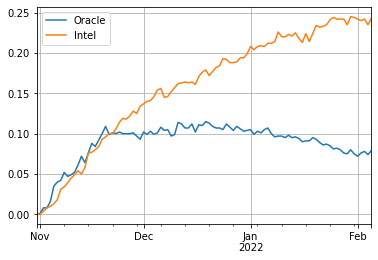

In [64]:
ps_orcl = bs_tsla.mean(axis=1)
ps_intc = bs_googl.mean(axis=1)
ps_orcl.plot(grid=True, label="Oracle")
ps_intc.plot(grid=True, label="Intel") 
plt.legend()

#### Extra <font size='1'>(10 puntos)</font>

Compara tus resultados con los valores verdaderos.

In [65]:
rl = np.log(data/data.shift())
rl=(np.log(data) - np.log(data.shift())).dropna()
from datetime import datetime, timedelta
def sim_rl(media, std, inicio, final, N) :
    fi = inicio
    ff = final
    fechai = datetime.strptime(fi, "%Y-%m-%d")
    fechaf = datetime.strptime(ff, "%Y-%m-%d")
    dias = (fechaf - fechai) / timedelta(days=1)
    fechas = pd.date_range(inicio,periods=dias)
    return pd.DataFrame(index=fechas,data=np.random.normal(media,std,(int(dias),N)))

/Users/jap/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


/Users/jap/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


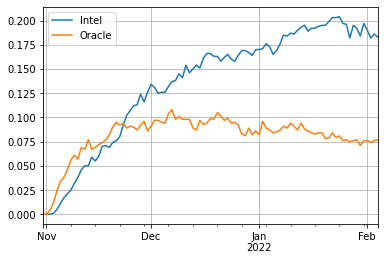

In [66]:
rl1 = (d1 - d1.shift())/(d1.shift())
rl1 = np.log(d1/d1.shift()).dropna()
rlmedia_orcl = rl1.mean()
rlstd_orcl = rl1.std()
rl_simulados1= sim_rl(rlmedia_orcl, rlstd_orcl, "2021-10-31","2022-02-05", 1000)

rl2 = (d2 - d2.shift())/(d2.shift())
rl2 = np.log(d2/d2.shift()).dropna()
rlmedia_intc = rl2.mean()
rlstd_intc = rl2.std()
rl_simulados2= sim_rl(rlmedia_intc, rlstd_intc, "2021-10-31","2022-02-05", 1000)

rlvalor_deseado1 = d1[-1]*1.10
rlretorno = (1+rl_simulados1).cumprod()*d1[-1]
rlbs_orcl = rlretorno >= rlvalor_deseado1
rlvalor_deseado2 = d2[-1]*1.10
rlretorno2 = (1+ rl_simulados2).cumprod()*d2[-1]
rlbs_intc = rlretorno2 >= rlvalor_deseado2
rlps_orcl = rlbs_orcl.mean(axis=1)
rlps_intc = rlbs_intc.mean(axis=1)
rlps_intc.plot(grid=True, label="Intel")
rlps_orcl.plot(grid=True, label="Oracle")
plt.legend()

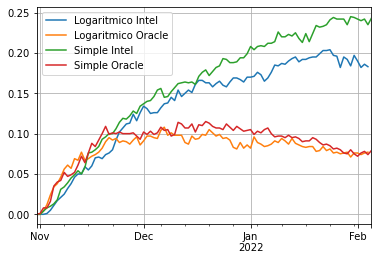

In [67]:
rlps_intc.plot(grid=True, label="Logaritmico Intel")
rlps_orcl.plot(grid=True, label="Logaritmico Oracle") 
ps_intc.plot(grid=True, label="Simple Intel") 
ps_orcl.plot(grid=True, label="Simple Oracle") 
plt.legend()

Se puede apreciar una pequeña variación entre los cálculos logarítmicos y los simples debido a que los simples arrojan un resultado más certero, mientras que los logarítmicos pueden variar un poco más.
En este caso los rendimientos logarítmicos muestran que hay una menor posibilidad de obtener ganancias.